In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# Create the data
data = {
    'Hours_Studied': [5, 3, 8, 2, 7, 1, 4, 6, 5, 3],
    'Hours_Slept': [8, 6, 7, 5, 6, 4, 6, 7, 5, 5],
    'Result': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [11]:
x = df.loc[:, ['Hours_Studied','Hours_Slept']]
y = df['Result']

In [12]:
x

,Hours_Studied,Hours_Slept
0,5,8
1,3,6
2,8,7
3,2,5
4,7,6
5,1,4
6,4,6
7,6,7
8,5,5
9,3,5


In [13]:
y

0    1
1    0
2    1
3    0
4    1
5    0
6    0
7    1
8    1
9    0
Name: Result, dtype: int64

In [14]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [15]:
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(x_test)

In [18]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [28]:
panelty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params = dict(penalty=panelty, C = c_values, solver=solver)

cv = StratifiedKFold(n_splits=2)

gridcv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=cv, scoring="accuracy")

In [29]:
gridcv.fit(x_train, y_train)

H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [30]:
y_pred = gridcv.predict(x_test)

In [31]:
accuracy_score(y_test, y_pred)

0.6666666666666666

<Axes: xlabel='Result'>

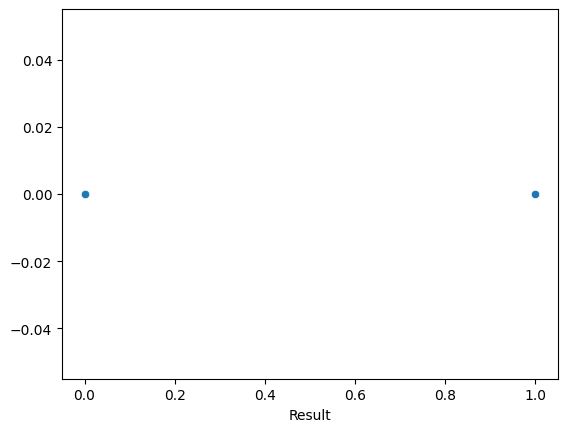

In [32]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)

In [34]:
y_pred

array([0, 0, 0])